#                                        FLIGHT FARE PRICE PREDICTION

### INTRODUCTION
 - Air flight transportation plays a crucial role in connecting people and goods across the globe, offering a fast and efficient means of travel. It has become an integral part of modern society, facilitating business, tourism, and trade. 

- The Indian aviation industry has experienced remarkable growth over the past decade. From being a luxury accessible to a privileged few, it has become the third-largest domestic market globally. The number of operational airports has risen from 74 to 140 in eight years, with plans for 220 airports in the next five year

- This project uses machine learning techniques to predict flight ticket price in advance so that customers can save money or make personal financial budget allocation for their flight journey also compare price of different flights to make better decesions.



### OBJECTIVE
 - The objective of the Flight Ticket Price Prediction project is to develop an accurate and efficient model that can predict   airfare based on various input features by Leveraging machine learning algorithms and historical flight data, the project aims to create a predictive model.

### RELEVENCE
 - A Flight Ticket Price Prediction Model project is relevant for providing travelers with accurate forecasts of airfare costs, enabling better budget planning and decision-making. It enhances user experience, empowers consumers, and offers valuable market insights to the aviation industry for optimizing pricing strategies and revenue management. The project's data-driven approach contributes to transparency, efficiency, and improved satisfaction in the air travel ecosystem.


### IMPORTING LIBRARIES

In [104]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.svm import SVR

warnings.filterwarnings("ignore")
import numpy as np

### READING DATA

In [105]:
data=pd.read_csv("fly_file.csv")

In [106]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2018,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,01/05/2018,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/2018,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2018,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2018,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
21361,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
21362,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
21363,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
21364,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21366 entries, 0 to 21365
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          21366 non-null  object
 1   Date_of_Journey  21366 non-null  object
 2   Source           21366 non-null  object
 3   Destination      21366 non-null  object
 4   Route            21364 non-null  object
 5   Dep_Time         21366 non-null  object
 6   Arrival_Time     21366 non-null  object
 7   Duration         21366 non-null  object
 8   Total_Stops      21364 non-null  object
 9   Additional_Info  21366 non-null  object
 10  Price            21366 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.8+ MB


### CHECKING NULL VALUES

In [108]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              2
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        2
Additional_Info    0
Price              0
dtype: int64

In [109]:
#DROPING NULL VALUES
data.dropna(inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [110]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2018,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,01/05/2018,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/2018,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2018,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2018,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
21361,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
21362,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
21363,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
21364,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## DATA VISUALISATION 

In [111]:
# Removing Jet airways business rows from dataset since we are only predicting onomy class ticket
#also it will be a outlier toour model

data = data[data["Airline"] != "Jet Airways Business"]


In [112]:
average_prices = data.groupby('Airline')['Price'].mean().reset_index()
average_prices = average_prices.sort_values('Price', ascending=False)

# Display the DataFrame
print(average_prices)

                              Airline         Price
4                         Jet Airways  11643.923357
6   Multiple carriers Premium economy  11418.846154
5                   Multiple carriers  10902.678094
1                           Air India   9612.427756
10            Vistara Premium economy   8962.333333
9                             Vistara   7796.348643
2                               GoAir   5861.056701
3                              IndiGo   5673.682903
0                            Air Asia   5590.260188
7                            SpiceJet   4338.284841
8                              Trujet   4140.000000


Text(0.5, 1.0, 'Average Price of Each Airline')

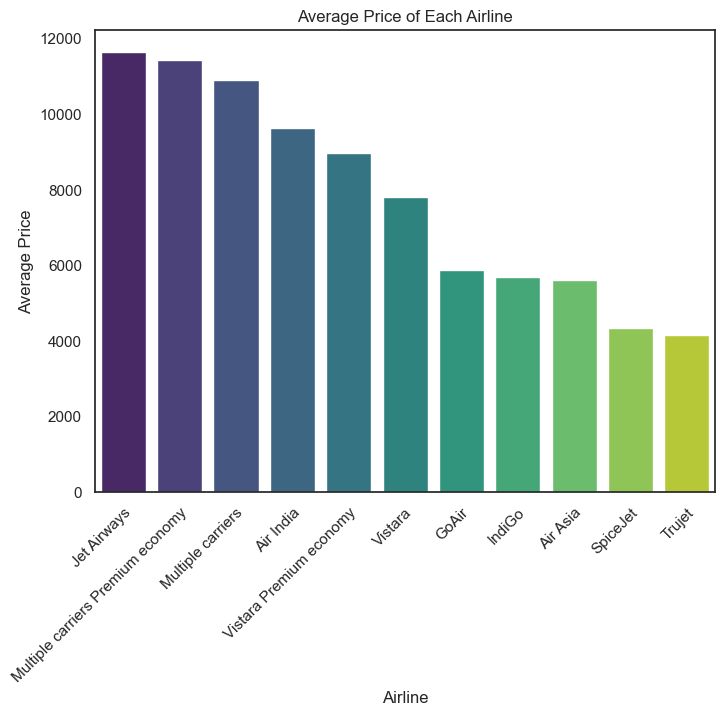

In [113]:
# Average Prices of Every Airlines

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.barplot(x='Airline', y='Price', data=average_prices, palette='viridis')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Add labels and title
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price of Each Airline')


Jet Airways has highest average price 

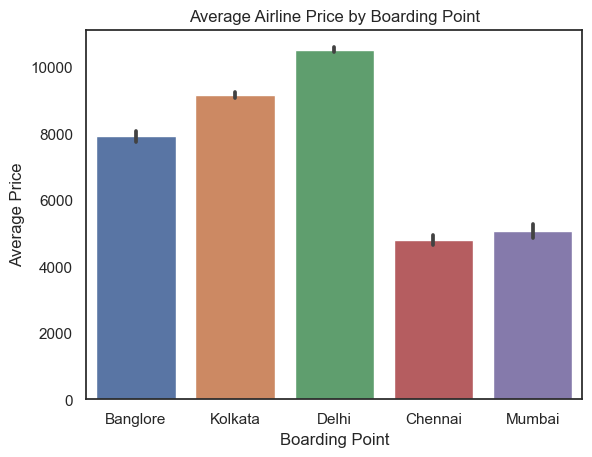

In [114]:
sns.barplot(x='Source', y='Price', data=data)
plt.xlabel('Boarding Point')
plt.ylabel('Average Price')
plt.title('Average Airline Price by Boarding Point')
plt.show()

flights boarding from delhi are more expensive than flights from other boarding points

In [115]:
data["Source"].value_counts()

Source
Delhi       9068
Kolkata     5742
Banglore    4386
Mumbai      1394
Chennai      762
Name: count, dtype: int64

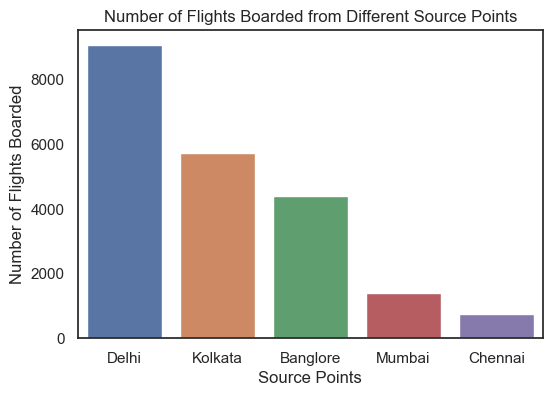

In [116]:
flight_counts = data['Source'].value_counts()
plt.figure(figsize=(6,4))  
sns.barplot(x=flight_counts.index, y=flight_counts.values)
plt.xlabel('Source Points')
plt.ylabel('Number of Flights Boarded')
plt.title('Number of Flights Boarded from Different Source Points')
plt.show()

The highest number of flights depart from Delhi followed by kolkata and Banglore

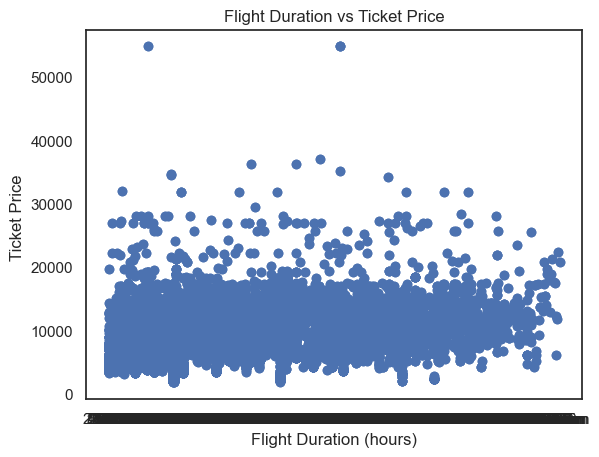

In [117]:
plt.scatter(data["Duration"],data["Price"])


plt.xlabel('Flight Duration (hours)')
plt.ylabel('Ticket Price ')
plt.title('Flight Duration vs Ticket Price')

# Display the plot
plt.show()

From this graph we can understand that price of flight ticket is not incresing as the duration is increasing.So, duration has less influence in price feature

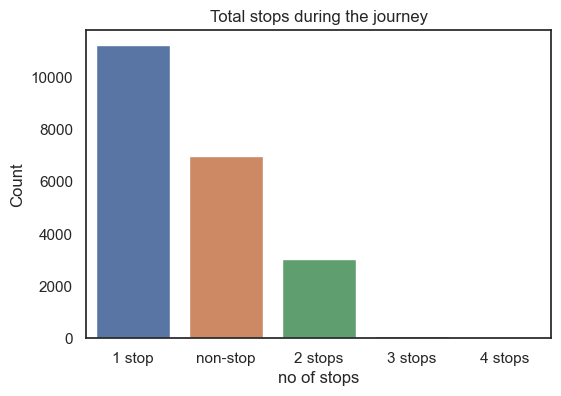

In [118]:
stops_counts = data['Total_Stops'].value_counts()
plt.figure(figsize=(6,4))  
sns.barplot(x=stops_counts.index, y=stops_counts.values)
plt.xlabel('no of stops')
plt.ylabel('Count')
plt.title('Total stops during the journey')
plt.show()

Majority of flights have one stop or are non_stop between the journey

In [119]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2018,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,01/05/2018,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/2018,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2018,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2018,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
21361,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
21362,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
21363,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
21364,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## 1. DATA CLEANING - Total Stops

In [120]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [121]:
data["Total_Stops"].info()

<class 'pandas.core.series.Series'>
Index: 21352 entries, 0 to 21365
Series name: Total_Stops
Non-Null Count  Dtype 
--------------  ----- 
21352 non-null  object
dtypes: object(1)
memory usage: 333.6+ KB


In [122]:
data["Total_Stops"]=data["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [123]:
data["Total_Stops"]=data["Total_Stops"].astype(int)
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2018,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,01/05/2018,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,09/06/2018,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2018,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2018,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302


## 2. DATA CLEANING - Date of Journey

In [124]:
data["Date_of_Journey"].unique()

array(['24/03/2018', '01/05/2018', '09/06/2018', '12/05/2018',
       '01/03/2018', '24/06/2018', '12/03/2018', '27/05/2018',
       '01/06/2018', '18/04/2018', '09/05/2018', '24/04/2018',
       '03/03/2018', '15/04/2018', '12/06/2018', '06/03/2018',
       '21/03/2018', '03/04/2018', '06/05/2018', '15/05/2018',
       '18/06/2018', '15/06/2018', '06/04/2018', '18/05/2018',
       '27/06/2018', '21/05/2018', '03/06/2018', '15/03/2018',
       '03/05/2018', '09/03/2018', '06/06/2018', '24/05/2018',
       '01/04/2018', '21/04/2018', '21/06/2018', '27/03/2018',
       '18/03/2018', '12/04/2018', '09/04/2018', '27/04/2018',
       '24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '

In [125]:
#all dates are in 2019 so no need to seperate it
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month




data.drop('Date_of_Journey', axis=1, inplace=True)

In [126]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
21361,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,0,No info,4107,9,4
21362,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,0,No info,4145,27,4
21363,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,0,No info,7229,27,4
21364,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,0,No info,12648,1,3


## 3. DATA CLEANING - Duration

In [127]:
# def convert_duration(Duration):
#     if pd.isnull(Duration):
#         return None, None

#     hours, minutes = 0, 0

#     if 'h' in Duration:
#         hours = int(Duration.split('h')[0])

#     if 'm' in Duration:
#         minutes = int(Duration.split('m')[0].split()[-1])

#     return hours, minutes

# data["Hours"] = data["Duration"].apply(convert_duration).apply(lambda x: x[0])


# data["Minutes"] = data["Duration"].apply(convert_duration).apply(lambda x: x[1])

# # data=data.drop("Duration",axis=1)
data=data.drop("Duration",axis=1)



#### Droping duration column as it have less influence on ticket price
#### from the scatter plot above Duration has less influence on price


In [128]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,0,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,2,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,1,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,1,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...
21361,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,0,No info,4107,9,4
21362,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,0,No info,4145,27,4
21363,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,0,No info,7229,27,4
21364,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,0,No info,12648,1,3


In [129]:
# Removing business class ticket row as they will be outliers to price 

In [130]:
data["Additional_Info"].value_counts()

Additional_Info
No info                         16682
In-flight meal not included      3964
No check-in baggage included      640
1 Long layover                     38
Change airports                    14
No Info                             6
1 Short layover                     2
Business class                      2
Red-eye flight                      2
2 Long layover                      2
Name: count, dtype: int64

In [131]:
index_remove = data[data['Additional_Info'] == 'Business class'].index
data = data.drop(index=index_remove)

## 4. DATA CLEANING - DROPING COLUMNS

In [132]:
data=data.drop("Additional_Info",axis=1)
data=data.drop("Route",axis=1)
data=data.drop(["Dep_Time","Arrival_Time"],axis=1)

In [133]:
data.head(8)

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,0,3897,24,3
1,Air India,Kolkata,Banglore,2,7662,1,5
2,Jet Airways,Delhi,Cochin,2,13882,9,6
3,IndiGo,Kolkata,Banglore,1,6218,12,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3
5,SpiceJet,Kolkata,Banglore,0,3873,24,6
6,Jet Airways,Banglore,New Delhi,1,11087,12,3
7,Jet Airways,Banglore,New Delhi,1,22270,1,3


In [134]:
# CHECKING THE DATA TYPES OF EACH COLUMN

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21350 entries, 0 to 21365
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        21350 non-null  object
 1   Source         21350 non-null  object
 2   Destination    21350 non-null  object
 3   Total_Stops    21350 non-null  int32 
 4   Price          21350 non-null  int64 
 5   Journey_Day    21350 non-null  int32 
 6   Journey_Month  21350 non-null  int32 
dtypes: int32(3), int64(1), object(3)
memory usage: 1.1+ MB


In [135]:
# CHEHCING UNIQUE VALUES IN AIRLINE COLUMN

data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

## 5. DATA CLEANING - LABEL ENCODING

In [136]:
airline=LabelEncoder()
source=LabelEncoder()
destination=LabelEncoder()


data["Airline"]=airline.fit_transform(data["Airline"])
data["Source"]=source.fit_transform(data["Source"])
data["Destination"]=destination.fit_transform(data["Destination"])


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21350 entries, 0 to 21365
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Airline        21350 non-null  int32
 1   Source         21350 non-null  int32
 2   Destination    21350 non-null  int32
 3   Total_Stops    21350 non-null  int32
 4   Price          21350 non-null  int64
 5   Journey_Day    21350 non-null  int32
 6   Journey_Month  21350 non-null  int32
dtypes: int32(6), int64(1)
memory usage: 834.0 KB


In [138]:
data

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month
0,3,0,5,0,3897,24,3
1,1,3,0,2,7662,1,5
2,4,2,1,2,13882,9,6
3,3,3,0,1,6218,12,5
4,3,0,5,1,13302,1,3
...,...,...,...,...,...,...,...
21361,0,3,0,0,4107,9,4
21362,1,3,0,0,4145,27,4
21363,4,0,2,0,7229,27,4
21364,9,0,5,0,12648,1,3


## 6. DATA CLEANING - REMOVING OUTLERS

In [139]:
def remove_airline_price_outliers(data):
    df_out = pd.DataFrame()
    for airline,airline_data in data.groupby('Airline'):
        for source,source_data in airline_data.groupby('Source'):
            for destination,destination_data in source_data.groupby('Destination'):
                
                
                m = np.mean(destination_data['Price'])
                st = np.std(destination_data['Price'])
                
                reduced_df = destination_data[(destination_data['Price'] >=(m-st)) & (destination_data['Price'] <= (m+st))]
                
                df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        
    return df_out
        
df2 = remove_airline_price_outliers(data)

Airline name, boarding point and destination are the features important to flight ticket price.So, we will remove outliers in thease features

In [140]:
df2.shape

(16052, 7)

In [141]:
data.shape

(21350, 7)

### CORRELATION MATRIX

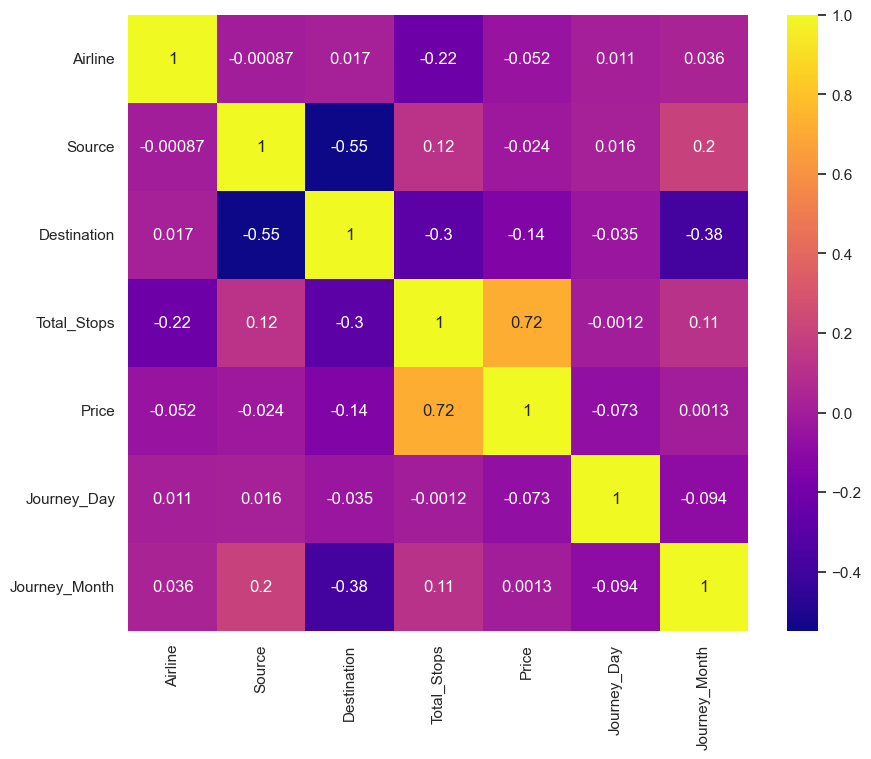

In [142]:
#checking correlation of each feature to price

correlation_matrix = df2.corr()

sns.set(style="white")  
plt.figure(figsize=(10, 8))  


sns.heatmap(correlation_matrix, annot=True, cmap="plasma")


plt.show()

## BUILDING MODELS

In [143]:
x=df2.drop("Price",axis=1)
y=df2["Price"]

In [144]:
x

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month
0,0,0,2,0,6,5
1,0,0,2,0,3,4
2,0,0,2,0,12,6
3,0,0,2,0,24,4
4,0,0,2,0,18,4
...,...,...,...,...,...,...
16047,10,0,2,0,6,4
16048,10,0,5,0,3,3
16049,10,0,5,0,3,3
16050,10,1,4,0,1,3


In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [146]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [48]:
# LINEAR REGRESSION

lrm=LinearRegression(fit_intercept=True)
lrm.fit(x_train,y_train)
lrm.score(x_test,y_test)

0.5896582909730779

In [147]:
# RANDOM FOREST REGRESSOR

rfr=RandomForestRegressor(n_estimators=500,random_state=42)
rfr.fit(x_train,y_train)

rfr.score(x_test,y_test)



0.8841069185858211

In [51]:
# DECISIONTREE REGRESSOR

dtr=DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test)

0.8323906464362459

In [ ]:
# EXTRA TREE REGRESSOR

from sklearn.ensemble import ExtraTreesRegressor
etr= ExtraTreesRegressor(n_estimators=100,random_state=42)
etr.fit(x_train,y_train)
etr.score(x_test,y_test)

In [ ]:
# K-NEIGHBORS REGRESSOR

knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

In [148]:
# EXTREME GRADIENT BOOSTING REGRESSOR

xgbr = XGBRegressor(learning_rate=0.2, max_depth=6, n_estimators=300)
xgbr.fit(x_train, y_train)
xgbr.score(x_test,y_test)


0.8844620673368712

In [149]:
# GRADIENT BOOSTING REGRESSOR

gbr=GradientBoostingRegressor(learning_rate=0.2,n_estimators=300,max_depth=6)
gbr.fit(x_train,y_train)
gbr.score(x_test,y_test)


0.8844187695344146

In [ ]:


#ADABOOST REGRESSOR

abr=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=0.2,n_estimators=250)
abr.fit(x_train,y_train)
abr.score(x_test,y_test)

SVM ALGORITHM

In [ ]:
linear=SVR(kernel="linear",C=1500)
linear.fit(x_train,y_train)
linear.score(x_test,y_test)

In [ ]:
rbf=SVR()                       #RADIAL BASIS FUNCTION
rbf.fit(x_train,y_train)
rbf.score(x_test,y_test)

In [259]:
sigmoid=SVR(kernel="sigmoid",gamma=100,C=5)
sigmoid.fit(x_train,y_train)
sigmoid.score(x_test,y_test)

0.15359501606207293

## MODEL EVALUATION

In [112]:
stratified_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

linear_regression_score = []
decision_tree_score = []
random_forest_score = []
adaboost_score = []
xgboost_score = []
gradient_boost_score = []

# Loop through the cross-validation splits using StratifiedKFold
for train_index, test_index in stratified_fold.split(x, y):
    # Reset the index of the DataFrame
    x_train, x_test = x.iloc[train_index].reset_index(drop=True), x.iloc[test_index].reset_index(drop=True)
    y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_regression_score.append(get_score(linear_model, x_train, x_test, y_train, y_test))
    
    # Decision Tree
    decision_tree_model = DecisionTreeRegressor(random_state=42)
    decision_tree_score.append(get_score(decision_tree_model, x_train, x_test, y_train, y_test))
    
    # RandomForest
    random_forest_model = RandomForestRegressor(random_state=42)
    random_forest_score.append(get_score(random_forest_model, x_train, x_test, y_train, y_test))
    
    # AdaBoostRegressor
    adaboost_model = AdaBoostRegressor(random_state=42)
    adaboost_score.append(get_score(adaboost_model, x_train, x_test, y_train, y_test))
    
    # XGBoost
    xgboost_model = XGBRegressor(random_state=42)
    xgboost_score.append(get_score(xgboost_model, x_train, x_test, y_train, y_test))
    
    # Gradient Boosting
    gradient_boost_model = GradientBoostingRegressor(random_state=42)
    gradient_boost_score.append(get_score(gradient_boost_model, x_train, x_test, y_train, y_test))

In [113]:
gradient_boost_score

[0.8632566834094443,
 0.8631615404933541,
 0.8629477562655138,
 0.8663003962862377,
 0.8600081813152181]

In [114]:
xgboost_score

[0.8896093446074957,
 0.8867098550203113,
 0.8881821732191263,
 0.8909600183413785,
 0.886381952604056]

In [115]:
adaboost_score

[0.7444848548698819,
 0.7569974501292516,
 0.7476392571361041,
 0.7498308156083258,
 0.7477784189877341]

In [116]:
random_forest_score

[0.8892723056913013,
 0.8867708571684441,
 0.8877936957875932,
 0.8909064191099159,
 0.8856918614442235]

In [117]:
linear_regression_score

[0.5537842227870757,
 0.5473345470660052,
 0.5443699213658846,
 0.5547149552831199,
 0.5495124825566271]

## HYPERPARAMETER TUNING

In [150]:
model_params = {
    "random_forest": {"model": RandomForestRegressor(), "params": {"n_estimators": [50, 200, 100,500], "random_state": [42, 100,200, 500]}},
    "linear_regression": {"model": LinearRegression(), "params": {"fit_intercept": [True, False]}},
    "adaboost": {"model": AdaBoostRegressor(base_estimator=DecisionTreeRegressor()), "params": {"n_estimators": [50, 100, 200,500], "learning_rate": [0.25, 0.1, 0.2]}},
    "gradient_boosting": {"model": GradientBoostingRegressor(), "params": {"n_estimators": [100, 200,300,50], "learning_rate": [0.1, 0.25, 0.2], "max_depth": [4, 5, 6, 7]}},
    "xgboost": {"model": XGBRegressor(), "params": {"n_estimators": [65, 100, 200,300], "learning_rate": [0.1, 0.15, 0.2, 0.25], "max_depth": [4, 5, 6, 7]}},
    "decision_tree": {"model": DecisionTreeRegressor(), "params": {"max_depth": [5, 6, 7]}}
}

scores = []
models = ["random_forest", "linear_regression", "adaboost", "gradient_boosting", "xgboost", "decision_tree"]

for model_name in models:
    mp = model_params[model_name]
    gds = GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=True)
    gds.fit(x_train, y_train)
    scores.append({"model": model_name, "best_score": gds.best_score_, "best_params": gds.best_params_})

In [151]:
df=pd.DataFrame(scores)
df

,model,best_score,best_params
0,random_forest,0.884622,"{'n_estimators': 500, 'random_state': 42}"
1,linear_regression,0.548331,{'fit_intercept': True}
2,adaboost,0.876591,"{'learning_rate': 0.1, 'n_estimators': 50}"
3,gradient_boosting,0.886237,"{'learning_rate': 0.2, 'max_depth': 6, 'n_esti..."
4,xgboost,0.886358,"{'learning_rate': 0.15, 'max_depth': 6, 'n_est..."
5,decision_tree,0.868701,{'max_depth': 7}


In [152]:
scores

[{'model': 'random_forest',
  'best_score': 0.8846219697417219,
  'best_params': {'n_estimators': 500, 'random_state': 42}},
 {'model': 'linear_regression',
  'best_score': 0.5483312059772343,
  'best_params': {'fit_intercept': True}},
 {'model': 'adaboost',
  'best_score': 0.8765908045357579,
  'best_params': {'learning_rate': 0.1, 'n_estimators': 50}},
 {'model': 'gradient_boosting',
  'best_score': 0.8862373672827717,
  'best_params': {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}},
 {'model': 'xgboost',
  'best_score': 0.8863581206683822,
  'best_params': {'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 200}},
 {'model': 'decision_tree',
  'best_score': 0.8687008408213517,
  'best_params': {'max_depth': 7}}]

## BEST MODEL

In [153]:
final_model= XGBRegressor(learning_rate=0.15, max_depth=6, n_estimators=200)
final_model.fit(x_train,y_train)
final_model.score(x_test,y_test)

0.8840539408683266

In [154]:
final_model.score(x_train,y_train)

0.8934786723884113

In [155]:
y_pred=final_model.predict(x_test)

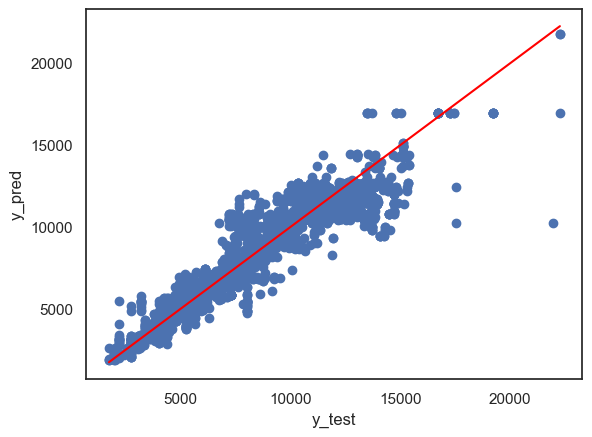

In [156]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

This scatter plot represent the performance of the model in predicting values and it is showing good performance

## MODEL SAVING


In [2]:
import joblib

In [3]:
joblib.dump(final_model,"FLIGHT_DATA2.CSV")

NameError: name 'final_model' is not defined

In [4]:
joblib_reload=joblib.load("FLIGHT_DATA2.csv")

## USER INPUTTING AND PREDICTION

In [157]:
airline1=input("enter the airline name:['IndiGo','Jet Airways', 'SpiceJet','Multiple carriers','Air India', 'GoAir', 'Vistara', 'Air Asia','Vistara Premium economy','Multiple carriers Premium economy', 'Trujet'] \n")
               
airline1=int(airline.transform([airline1]))

source1=input("enter the boarding destination:['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']\n")
source1=int(source.transform([source1]))
            
destination1=input("enter the arrival destination:['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']\n")
destination1=int(destination.transform([destination1]))


total_stops=int(input("enter number of stops:[0,1,2,3,4]\n"))  









    

enter the airline name:['IndiGo','Jet Airways', 'SpiceJet','Multiple carriers','Air India', 'GoAir', 'Vistara', 'Air Asia','Vistara Premium economy','Multiple carriers Premium economy', 'Trujet'] 
IndiGo
enter the boarding destination:['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
Banglore
enter the arrival destination:['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']
New Delhi
enter number of stops:[0,1,2,3,4]
0


In [158]:
# dep_hour=int(input("enter departure time hour \n"))   
# dep_min=int(input("enter departure time  minute \n"))   

# arrival_hour=int(input("enter the arrival time hour \n"))   
# arrival_min=int(input("enterthe arrival time minute \n"))   

journey_day=int(input("enter the journey date day \n"))   
journey_month=int(input("enter the journey date month \n"))





enter the journey date day 
15
enter the journey date month 
2


In [57]:
# dur_hour=int(input("enter the flight duration hour:[0-40] \n"))
# dur_min=int(input("enter the flight duration minutes:[50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40]\n]"))



enter the flight duration hour:[0-40] 
1
enter the flight duration minutes:[50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40]
]5


In [159]:
#final_model.predict([['airline1','source1','destination1','total_stops','dep_hour','dep_min','arrival_hour','arrival_min','journey_day','journey_month']])
input_features = [airline1, source1, destination1, total_stops, journey_day, journey_month]

#Convert the list to a numpy array for prediction
input_array = np.array(input_features).reshape(1, -1)

# # Make predictions
prediction = final_model.predict(input_array)

print("Predicted Price of ticket: Rs", int(prediction))

Predicted Price of ticket: Rs 7318
